# Abstract

## pipeline of the project

<img style="float: right;" src="https://raw.githubusercontent.com/Mt-Kunlun/MarkdownPhotos/master/Res/13bb87a6fde4d6f878ab87160591b09.png" width="100%">

# Preparation

We will do three work in the preparation part:  
(1)We import some important package  
(2)We read in our dataset  
(3)We clean our dataset  

In [1]:
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import numpy as np

In [2]:
df = pd.read_csv('C:\\Users\\51645\\Desktop\\fake_or_real_news.csv')
df1 = pd.read_csv('C:\\Users\\51645\\Desktop\\fake.csv')
#fake news dataset from https://www.kaggle.com/burakhmmtgl/exploratory-analysis/data
df2 = pd.read_csv('C:\\Users\\51645\\Desktop\\Real.csv')
#real news dataset from https://www.kaggle.com/snapcrack/all-the-news/data
df.head()

,Unnamed: 0,title,text,label,title_vectors
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,[ 1.1533764e-02 4.2144405e-03 1.9692603e-02 ...
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,[ 0.11267698 0.02518966 -0.00212591 0.021095...
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,[ 0.04253004 0.04300297 0.01848392 0.048672...
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,[ 0.10801624 0.11583211 0.02874823 0.061732...
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,[ 1.69016439e-02 7.13498285e-03 -7.81233795e-...


In [3]:
df1.head()

,uuid,ord_in_thread,author,published,title,text,language,crawled,site_url,country,domain_rank,thread_title,spam_score,main_img_url,replies_count,participants_count,likes,comments,shares,type
0,6a175f46bcd24d39b3e962ad0f29936721db70db,0,Barracuda Brigade,2016-10-26T21:41:00.000+03:00,Muslims BUSTED: They Stole Millions In Gov’t B...,Print They should pay all the back all the mon...,english,2016-10-27T01:49:27.168+03:00,100percentfedup.com,US,25689.0,Muslims BUSTED: They Stole Millions In Gov’t B...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
1,2bdc29d12605ef9cf3f09f9875040a7113be5d5b,0,reasoning with facts,2016-10-29T08:47:11.259+03:00,Re: Why Did Attorney General Loretta Lynch Ple...,Why Did Attorney General Loretta Lynch Plead T...,english,2016-10-29T08:47:11.259+03:00,100percentfedup.com,US,25689.0,Re: Why Did Attorney General Loretta Lynch Ple...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
2,c70e149fdd53de5e61c29281100b9de0ed268bc3,0,Barracuda Brigade,2016-10-31T01:41:49.479+02:00,BREAKING: Weiner Cooperating With FBI On Hilla...,Red State : \nFox News Sunday reported this mo...,english,2016-10-31T01:41:49.479+02:00,100percentfedup.com,US,25689.0,BREAKING: Weiner Cooperating With FBI On Hilla...,0.000,http://bb4sp.com/wp-content/uploads/2016/10/Fu...,0,1,0,0,0,bias
3,7cf7c15731ac2a116dd7f629bd57ea468ed70284,0,Fed Up,2016-11-01T05:22:00.000+02:00,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,Email Kayla Mueller was a prisoner and torture...,english,2016-11-01T15:46:26.304+02:00,100percentfedup.com,US,25689.0,PIN DROP SPEECH BY FATHER OF DAUGHTER Kidnappe...,0.068,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias
4,0206b54719c7e241ffe0ad4315b808290dbe6c0f,0,Fed Up,2016-11-01T21:56:00.000+02:00,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,Email HEALTHCARE REFORM TO MAKE AMERICA GREAT ...,english,2016-11-01T23:59:42.266+02:00,100percentfedup.com,US,25689.0,FANTASTIC! TRUMP'S 7 POINT PLAN To Reform Heal...,0.865,http://100percentfedup.com/wp-content/uploads/...,0,0,0,0,0,bias


In [4]:
df2.head()

,Unnamed: 0,id,title,publication,author,date,year,month,url,content
0,0,17283,House Republicans Fret About Winning Their Hea...,New York Times,Carl Hulse,2016-12-31,2016.0,12.0,NaN,WASHINGTON — Congressional Republicans have...
1,1,17284,Rift Between Officers and Residents as Killing...,New York Times,Benjamin Mueller and Al Baker,2017-06-19,2017.0,6.0,NaN,"After the bullet shells get counted, the blood..."
2,2,17285,"Tyrus Wong, ‘Bambi’ Artist Thwarted by Racial ...",New York Times,Margalit Fox,2017-01-06,2017.0,1.0,NaN,"When Walt Disney’s “Bambi” opened in 1942, cri..."
3,3,17286,"Among Deaths in 2016, a Heavy Toll in Pop Musi...",New York Times,William McDonald,2017-04-10,2017.0,4.0,NaN,"Death may be the great equalizer, but it isn’t..."
4,4,17287,Kim Jong-un Says North Korea Is Preparing to T...,New York Times,Choe Sang-Hun,2017-01-02,2017.0,1.0,NaN,"SEOUL, South Korea — North Korea’s leader, ..."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 5 columns):
Unnamed: 0       6335 non-null int64
title            6335 non-null object
text             6335 non-null object
label            6335 non-null object
title_vectors    6335 non-null object
dtypes: int64(1), object(4)
memory usage: 247.5+ KB


### Data Cleanning


In this part, we mainly do three work:  
(1) We remove some symbols and signals as well as stop words from the text  
(2) We combine the three dataset  
(3) We replace the 'Fake' and 'Real' into 0 and 1 

In [6]:
import nltk
from nltk.corpus import stopwords
from string import punctuation

nltk.download('punkt')

def clean_text(tokenized_list, sw):
    new_list = []
    nodes = [',', '*', '"', '.', '\'', '“', '”', '’', '‘', '，']
    for doc in tokenized_list:
        new_list.append([token.lower() for token in doc if token.lower() not in sw and token.lower() not in nodes])
    return new_list

texts = df.text
texts.append(df1.text)
tests.append(df2.content)

#create mapping for string translate method
mapping_table = {ord(char): u' ' for char in punctuation}

tokenized = [nltk.word_tokenize(review.translate(mapping_table)) for review in texts]

# Remove punctuations and stopwords, and lower-case text
sw = stopwords.words('english')
cleaned = clean_text(tokenized, sw)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\51645\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [7]:
cloud_words = []
for i, row in enumerate(cleaned):
    if df.label[i] == 'FAKE':
        for word in row:
            cloud_words.append(word)

In [8]:
from gensim import corpora

# Create a dictionary from list of documents
dictionary = corpora.Dictionary(cleaned)

E:\Anaconda3\lib\site-packages\gensim\utils.py:1167: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


# Data mining

In this part we mainly discuss three questions:  
(1) What are the key words of the News  
(2) What are the key words of the Fake News  
(3) The distribution of the length of the articles 

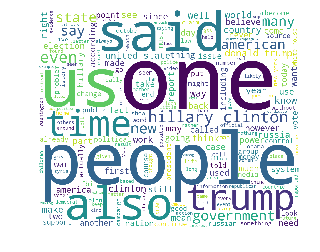

In [9]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')

wordcloud2 = WordCloud(
                          stopwords=STOPWORDS,
                          background_color='white',
                          width=1200,
                          height=1000
                         ).generate(" ".join(cloud_words))


plt.imshow(wordcloud2)
plt.axis('off')
plt.show()

We try to figure out some important words in those articles, which include words such as 'trump', 'us', 'clinton', 'russia' and so on.

In [10]:
bigrams = nltk.bigrams(cloud_words)
from collections import Counter

counter = Counter(bigrams)
print(counter.most_common(10))

[(('hillary', 'clinton'), 2470), (('donald', 'trump'), 1710), (('united', 'states'), 1431), (('white', 'house'), 736), (('new', 'york'), 691), (('clinton', 'campaign'), 502), (('clinton', 'foundation'), 436), (('secretary', 'state'), 405), (('wall', 'street'), 397), (('bill', 'clinton'), 370)]


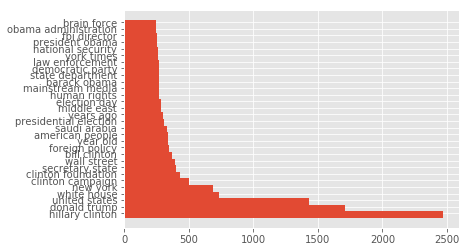

In [11]:
num_to_show = 30

labels = [" ".join(e[0]) for e in counter.most_common(num_to_show)]
values = [e[1] for e in counter.most_common(num_to_show)]

indexes = np.arange(len(labels))
width = 1

plt.barh(indexes, values, width)
plt.yticks(indexes + width * 0.2, labels)
plt.show()

We try to figure out some important word combination which is more useful than just look at the words, and those words are mostly in areas like politics, economics and human society.

In [12]:
def doc_length(text):
    return len([word for sent in text for word in sent])
df['doc_len'] = df['text'].apply(doc_length)
doc_lengths = list(df['doc_len'])
fakedoc_lengths = []
for i, label in enumerate(df.label):
    if label == 'FAKE':
        fakedoc_lengths.append(df['doc_len'][i])
df.drop(labels='doc_len', axis=1, inplace=True)
print("length of list:",len(doc_lengths),
      "\naverage document length", np.average(doc_lengths),
      "\nmaximum document length", max(doc_lengths))

length of list: 6335 
average document length 4707.25035517 
maximum document length 115372


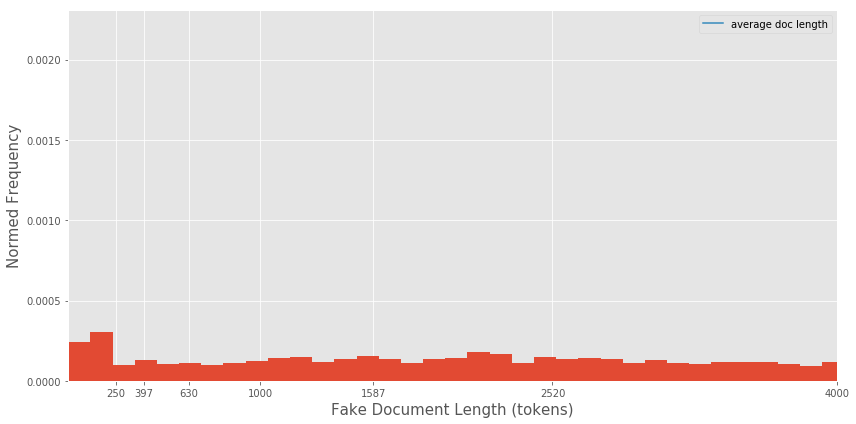

In [13]:
# plot a histogram of document length
num_bins = 1000
fig, ax = plt.subplots(figsize=(12,6));
# the histogram of the data
n, bins, patches = ax.hist(doc_lengths, num_bins, normed=1)
ax.set_xlabel('Fake Document Length (tokens)', fontsize=15)
ax.set_ylabel('Normed Frequency', fontsize=15)
ax.grid()
ax.set_xticks(np.logspace(start=np.log10(250),stop=np.log10(4000),num=7, base=10.0))
plt.xlim(0,4000)
ax.plot([np.average(fakedoc_lengths) for i in np.linspace(0.0,0.0022,100)], np.linspace(0.0,0.0022,100), '-',
        label='average doc length')
ax.legend()
ax.grid()
fig.tight_layout()
plt.show()

The number of the fake news decline with the range of the words number of the news.

# Feature Engineering and Classification Models

## part I: Classification models with TF-IDF features 

### Get Doc2Vec For each text

In [14]:
class TagDocIterator:
    def __init__(self, doc_list, idx_list):
        self.doc_list = doc_list
        self.idx_list = idx_list
        
    def __iter__(self):
        for doc, idx in zip(self.doc_list, self.idx_list):
            tag = [idx]
            yield TaggedDocument(words = doc, tags = tag)

In [15]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument
from nltk.corpus import reuters

# Create and train the doc2vec model. May take a few seconds
doc2vec = Doc2Vec(size=300, window=5, min_count=5, dm = 1, iter=10)

# Build the word2vec model from the corpus
doc2vec.build_vocab(TagDocIterator(cleaned, df.index))

E:\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:355: UserWarning: The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.
  warnings.warn("The parameter `iter` is deprecated, will be removed in 4.0.0, use `epochs` instead.")
E:\Anaconda3\lib\site-packages\gensim\models\doc2vec.py:359: UserWarning: The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.
  warnings.warn("The parameter `size` is deprecated, will be removed in 4.0.0, use `vector_size` instead.")


In [16]:
doc2vec.train(TagDocIterator(cleaned, df.index), epochs = 5, total_examples = doc2vec.corpus_count)

In [17]:
doc2vec.save('C:\\Users\\51645\\Desktop\\doc2vec.bin.gz')

### Get TF-IDF vector For each text

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [19]:
Tf_fit = []
for article in cleaned:
    str = ''
    for i in article:
        str += i
        str += ' '
    Tf_fit.append(str)

In [21]:
vectorizer.fit(Tf_fit)
tfidf_matrix = vectorizer.transform(Tf_fit).toarray()
print(tfidf_matrix)

[[ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]
 ..., 
 [ 0.          0.01034503  0.         ...,  0.          0.          0.        ]
 [ 0.          0.01270221  0.         ...,  0.          0.          0.        ]
 [ 0.          0.          0.         ...,  0.          0.          0.        ]]


In [25]:
num_tot = []
for i in range(len(tfidf_matrix[0])):
    num_tot.append(0)
for row in tfidf_matrix:
    for i in range(len(tfidf_matrix[0])):
        if row[i] != 0:
            num_tot[i] += 1
print(num_tot)

[58, 1228, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 5, 1, 1, 5, 4, 1, 1, 1, 1, 1, 4, 1, 2, 2, 2, 3, 1, 5, 1, 3, 44, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 34, 1, 3, 1, 3, 1, 4, 1, 4, 1, 1, 1, 37, 1, 2, 1, 1, 3, 1, 1, 1, 1, 1, 1, 19, 1, 1, 2, 1, 1, 1, 1, 1, 24, 2, 1, 1, 2, 3, 1, 22, 1, 2, 1, 1, 3, 3, 1, 48, 2, 1, 2, 1, 1, 1, 1, 45, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 45, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1302, 593, 16, 1, 1, 2, 2, 1, 1, 1, 2, 1, 8, 2, 2, 1, 5, 26, 1, 1, 1, 1, 3, 10, 1, 1, 2, 1, 1, 1, 14, 2, 1, 13, 2, 1, 1, 1, 1, 1, 1, 15, 1, 12, 1, 1, 9, 4, 1, 9, 1, 12, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 4, 1, 34, 2, 1, 1, 1034, 29, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 20, 1, 1, 1, 2, 10, 1, 1, 1, 13, 1, 6, 10, 1, 1, 3, 18, 1, 6, 1, 1, 1, 5, 2, 1, 8, 1, 1, 2, 1, 1, 1, 1, 4, 38, 1, 636, 44, 1, 2, 5, 1, 1, 12, 1, 12, 1, 1, 2, 7, 1, 1, 22, 1, 8, 1, 1, 1, 1, 5, 1, 1, 7, 1, 1, 1, 18, 1, 1, 1, 7, 1, 1, 1, 1, 3, 1, 2, 18, 416, 50, 1, 1, 2, 2, 1, 1, 24, 11, 2, 9, 1

In [26]:
index_list = []
for loop in range(300):
    index_max = 0
    for i in range(len(num_tot)):
        if i in index_list:
            continue
        else:
            index_max = i
            break
    for i in range(len(num_tot)):
        if i in index_list:
            continue
        elif num_tot[index_max] < num_tot[i]:
            index_max = i
    index_list.append(index_max)
print(index_list)

[42708, 52174, 66125, 3886, 44766, 41178, 60256, 35464, 21401, 46875, 14536, 61828, 56899, 23224, 37094, 34623, 25335, 66531, 63298, 12513, 66522, 36771, 64952, 785, 10396, 61458, 56912, 65186, 28322, 37667, 40038, 25860, 6361, 36550, 41203, 4058, 52676, 46086, 58853, 42176, 51066, 60480, 46877, 50347, 14632, 54877, 59931, 33865, 53415, 57193, 19967, 40725, 15952, 66070, 18636, 26055, 29017, 4503, 58187, 35948, 44197, 2581, 64746, 25776, 10325, 44253, 65415, 23955, 47723, 30233, 64851, 4055, 62705, 65093, 16679, 37978, 40918, 5246, 13091, 22382, 66038, 21432, 41261, 10464, 41167, 25924, 65355, 22149, 60040, 45999, 52684, 60271, 47973, 20476, 65841, 38658, 4067, 63332, 4134, 60436, 64438, 34903, 3881, 15964, 46070, 29055, 52685, 49223, 44310, 34963, 49047, 50349, 66586, 11457, 63335, 34745, 64756, 35471, 27971, 55879, 26519, 7461, 60009, 32503, 12406, 64446, 134, 60587, 7787, 35971, 7917, 49016, 46381, 59930, 10862, 45648, 28274, 35170, 1, 35704, 7269, 6172, 10373, 25137, 46496, 54477, 

In [27]:
X_100 = []
for row in tfidf_matrix:
    print(row)
    temp = []
    for i in index_list[:100]:
        temp.append(row[i])
    X_100.append(temp)
X_100 = np.array(X_100)

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.03073037  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.03813991  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.01788037  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  

[ 0.          0.06171284  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.01985185  0.         ...,  0.          0.          0.        ]
[ 0.          0.01486437  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.         0.0992191  0.        ...,  0.         0.         0.       ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.

[ 0.          0.01379186  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.02598222  0.         ...,  0.          0.          0.        ]
[ 0.          0.02027653  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.02334575  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.02480401  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0. 

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.04500551  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.07039431  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.00693827  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.02517198  0.         ...,  0.          0.          0.        ]
[ 0.          0.02008561  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.04172173  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.03007709  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.03785648  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.02468896  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.01515005  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.01882127  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.08471155  0.         ...,  0.          0.          0.        ]
[ 0.         0.0399893  0.    

In [28]:
X_200 = []
for row in tfidf_matrix:
    print(row)
    temp = []
    for i in index_list[:200]:
        temp.append(row[i])
    X_200.append(temp)
X_200 = np.array(X_200)

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.03073037  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.03813991  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.01788037  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.09128248  0.         ...,  0.          0.          0.        ]
[ 0.          0.02539117  0.         ...,  0.          0.          0.        ]
[ 0.          0.03072251  0.         ...,  0.          0.          0.        ]
[ 0.          0.02681214  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.02688656  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.         0.0443831  0.        ...,  0.         0.         0.       ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0. 

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.01932048  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.02828776  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.00805528  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.04487648  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.03322693  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.00500155  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.01171175  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.06196291  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.05316676  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.03353759  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.02764776  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.01527125  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  

[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.03987562  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.07140135  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.01417471  0.         ...,  0.          0.          0.        ]
[ 0.          0.03370042  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.12197277  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.          0.02009061  0.         ...,  0.          0.          0.        ]
[ 0.  0.  0. ...,  0.  0.  0.]
[ 0.  0.  0. ...,  0.  0.  0.]

## Classification Results

In [29]:
list_str = lambda i: i.strip('[').strip(']').split()
list_float = lambda i : [float(j) for j in i]
str_to_list_float = lambda i : list_float(list_str(i))

X = []
y = []
text_vectors = [doc2vec.infer_vector(i) for i in cleaned]

In [30]:
for l in df.label:
    if l == 'FAKE':
        y.append(0)
    else:
        y.append(1)
y_ = np.array(y, dtype = int)

In [31]:
for s in df.title_vectors:
    v = str_to_list_float(s)
    #print(v)
    X.append(v)

X_ = np.array(X)
print(X_)

[[ 0.01153376  0.00421444  0.0196926  ..., -0.02195547 -0.01884362
  -0.00064616]
 [ 0.11267698  0.02518966 -0.00212591 ..., -0.03747965 -0.00336942
  -0.01417533]
 [ 0.04253004  0.04300297  0.01848392 ..., -0.01918561  0.0113475
   0.00723551]
 ..., 
 [-0.02334819  0.02357412  0.03152522 ...,  0.02304046  0.03774392
   0.01736815]
 [ 0.05148737  0.07355158  0.03774464 ..., -0.04145266  0.05800788
   0.01764418]
 [ 0.0595002   0.06272358 -0.04209072 ..., -0.01759239  0.01852017
   0.01549395]]


In [32]:
X_ = np.hstack((X_, text_vectors))

In [33]:
X_ = np.hstack((X_, X_200))

In [34]:
seed = 42
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X_, y_, test_size = test_size, random_state = seed)

### Logistic Regression

In [35]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model = model.fit(X_train, y_train)

y_pred = model.predict(X_test)

model.score(X_test, y_test)

from sklearn.metrics import classification_report

target_names = ['Not Admitted', 'Admitted']

print(classification_report(y_test, y_pred, target_names=target_names))
print('Model Accuracy:',model.score(X_test, y_test))

              precision    recall  f1-score   support

Not Admitted       0.90      0.91      0.91      1071
    Admitted       0.91      0.90      0.90      1020

 avg / total       0.90      0.90      0.90      2091

Model Accuracy: 0.90387374462


### SVM

In [36]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

print(classification_report(y_test, y_pred, target_names = target_names))
print('Model Accuracy:',clf.score(X_test, y_test))

              precision    recall  f1-score   support

Not Admitted       0.81      0.93      0.87      1071
    Admitted       0.92      0.77      0.84      1020

 avg / total       0.86      0.85      0.85      2091

Model Accuracy: 0.854136776662


### Random Forests

In [51]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 10)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.score(X_test, y_test)

print(classification_report(y_test, y_pred, target_names = target_names))
print('Model Accuracy:',clf.score(X_test, y_test))

             precision    recall  f1-score   support

       Fake       0.88      0.87      0.88      1102
       Real       0.91      0.90      0.89       989

avg / total       0.90      0.89      0.89      2091

Model Accuracy: 0.903978957437


### XGBoost

In [38]:
from xgboost import XGBClassifier
XGmodel = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1000,
       n_jobs=2, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

XGmodel.fit(X_train, y_train)
y_pred = XGmodel.predict(X_test)
target_names = ['Fake', 'Real']

In [66]:
print(classification_report(y_test, y_pred, target_names=target_names))
print('Model Accuracy:',clf.score(X_test, y_test))

             precision    recall  f1-score   support

       Fake       0.92      0.90      0.91      1102
       Real       0.91      0.92      0.92       989

avg / total       0.92      0.91      0.91      2091

Model Accuracy: 0.920846173895


# part II: Classification models with concatenation of Doc2vec of titles and texts


## Data Preprocessing + Feature Representation (Doc2Vec) + Classification

Concatenation of __Document Vectors__ of Texts and Titles are used as the feature vectors of the news. As far as I am concerned, the sum or any other arithmetical operations might lead to a lost of information, while concatenation does not. Let the classifiers figure out how to treat these features themselves.

## 1. Data Preprocessing

## 2. Feature Representation

__Document Vectors__ are used to represeent features of documents. An assumption is made that the __doc2vec__ model is at its best if every dimention of the document vectors have nearly the same information. That is, the model is good if the eigon values of it are close to each other. Same eigon values means that each semantic dimension has the same information. __SVD__ is used to get the eigon values, and __standard deviation of the eigon values__ is adopted to measure how close the eigon values are close to each other.

In [13]:
## Load cleaned data
with open('./model/cleaned_df.json') as f:
    cleaned_df = json.loads(f.read())
cleaned_df = pd.DataFrame(cleaned_df)

In [ ]:
## Train the model given the window size and the dimension of the vector
def train(window, size):
    dv_text = gensim.models.Doc2Vec(size=size, window=window, min_count=1,
                                    workers=11,alpha=0.025, min_alpha=0.025)
    dv_text.build_vocab(it_text)

    for epoch in range(5):
        dv_text.train(it_text, total_examples=dv_text.corpus_count, epochs=dv_text.iter)
        dv_text.alpha -= 0.002            # decrease the learning rate
        dv_text.min_alpha = dv_text.alpha       # fix the learning rate, no deca
        dv_text.train(it_text, total_examples=dv_text.corpus_count, epochs=dv_text.iter)
    return np.asarray(dv_text.docvecs)

## Use standard deviation to evaluate the model
def assess(docvecs):
    _, s, _ = np.linalg.svd(docvecs)
    return np.std(docvecs)

In [7]:
## Exhaustive graid search is used here because the amount of the parameters are not large
# ## (only need to iterate 24 times)
params = {
    'window': [2, 3, 4, 5, 6, 7],
    'size': [100, 200, 300, 400]
}

result = {}
for window, size in product(params['window'], params['size']):
    docvecs = train(window, size)
    score = assess(docvecs)
    result[(window, size)] = score
    print('window: {} | size: {} | std: {}'.format(window, size, score))
    gc.collect()


window: 2 | size: 100 | std: 1.389212727546692
window: 2 | size: 200 | std: 1.1692640781402588
window: 2 | size: 300 | std: 1.027209758758545
window: 2 | size: 400 | std: 0.9105091691017151
window: 3 | size: 100 | std: 1.5845670700073242
window: 3 | size: 200 | std: 1.3133844137191772
window: 3 | size: 300 | std: 1.1476316452026367
window: 3 | size: 400 | std: 1.0154848098754883
window: 4 | size: 100 | std: 1.7485743761062622
window: 4 | size: 200 | std: 1.4314677715301514
window: 4 | size: 300 | std: 1.246058702468872
window: 4 | size: 400 | std: 1.1014412641525269
window: 5 | size: 100 | std: 1.8812700510025024
window: 5 | size: 200 | std: 1.5344595909118652
window: 5 | size: 300 | std: 1.3295661211013794
window: 5 | size: 400 | std: 1.1746494770050049
window: 6 | size: 100 | std: 1.9890187978744507
window: 6 | size: 200 | std: 1.6198973655700684
window: 6 | size: 300 | std: 1.4002981185913086
window: 6 | size: 400 | std: 1.2363835573196411
window: 7 | size: 100 | std: 2.08605647087

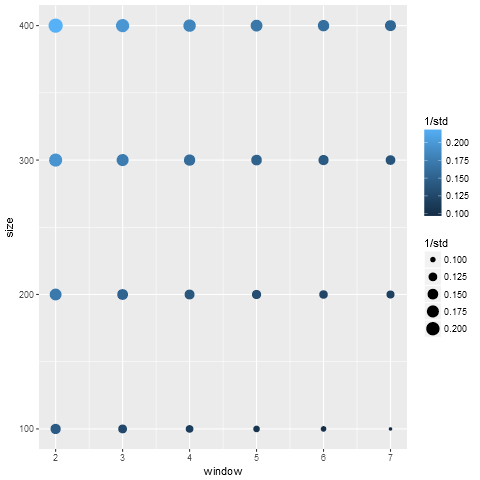

From the results and the graph (the larger and lighter-colored the point is, the smaller the std is) above we can see the best parameters are:
* __window 2__
* __size 400__
Thus, this set of parameters are finally used to train the document vectors.

## 3. Classification

Using the tuned model in __Section 2__, the best representation of the news are available. Five classifiers－__SVM, Logistic Regression, XGBoost, Random Forests and Neural Network__－ are applied and hypertuned seperatly. To get the most accurate classification, a voting machanism is adopted here. That is, five classifiers give their votes independently, weighted by their f1 score. The final label of a piece of news is determined by summing the votes up and see if it surpasses 0.5.

In [4]:
from gensim.models.doc2vec import LabeledSentence
class LabeledTitle:
    def __init__(self, wordsLists):
        self.wordsLists = wordsLists
    def __iter__(self):
        for i, words in enumerate(self.wordsLists):
            yield LabeledSentence(words=words, tags=[i])
            
class LabeledText:
    def __init__(self, wordsLists):
        self.wordsLists = wordsLists
    def __iter__(self):
        for i, words in enumerate(self.wordsLists):
            yield LabeledSentence(words=words, tags=[i])

it_title = LabeledText(cleaned_df['title'])
it_text = LabeledText(cleaned_df['text'])

In [6]:
dv_text = gensim.models.Doc2Vec(size=400, window=2, min_count=1,
                                workers=11,alpha=0.025, min_alpha=0.025)
dv_text.build_vocab(it_text)

for epoch in range(5):
    dv_text.train(it_text, total_examples=dv_text.corpus_count, epochs=dv_text.iter)
    dv_text.alpha -= 0.002            # decrease the learning rate
    dv_text.min_alpha = dv_text.alpha       # fix the learning rate, no deca
    dv_text.train(it_text, total_examples=dv_text.corpus_count, epochs=dv_text.iter)
dv_text.save('./model/dv_text_400')

D:\Anaconda3_501\lib\site-packages\ipykernel_launcher.py:14: DeprecationWarning: Call to deprecated `LabeledSentence` (Class will be removed in 4.0.0, use TaggedDocument instead).
  


In [5]:
dv_title = gensim.models.Doc2Vec.load('./model/dv_title')

In [6]:
dv_text = gensim.models.Doc2Vec.load('./model/dv_text_400')

In [7]:
X = np.column_stack((dv_title.docvecs, dv_text.docvecs))
y = np.loadtxt('./model/y.txt')

In [8]:
from sklearn.model_selection import train_test_split
seed = 3
X_train, X_test_valid, y_train, y_test_valid = train_test_split(X, y, test_size=0.3, random_state=seed)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_valid, y_test_valid,
                                                    test_size=0.33, random_state=seed)

In [23]:
def report_classify_result(y_pred, y_test):
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    print('Accuracy: {:.3f} | Precision: {:.3f} | Recall: {:.3f} | F1: {:.3f}'.format(accuracy,
                                                                                     precision,
                                                                                     recall,
                                                                                     f1))
def vote(votes):
#     if np.sum(votes) >= 0.5:
#         return 1
#     return 0
    if np.sum(votes) >= 3:
        return 1
    return 0

### 3.1 SVM

In [40]:
from sklearn.svm import SVC
svc = SVC()
param = {
    'C': stats.randint(1, 10),
    'gamma': stats.uniform(0.0001, 0.01)
}
n_iter = 50
seed = 15
random_search = RandomizedSearchCV(svc, param_distributions=param, random_state=seed, n_iter=n_iter
                                   ,return_train_score=True, n_jobs=4,
                                   scoring=metrics.make_scorer(metrics.f1_score))
random_search.fit(X_valid, y_valid)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
          fit_params=None, iid=True, n_iter=50, n_jobs=4,
          param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022D67DCCCF8>, 'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022D37836B38>},
          pre_dispatch='2*n_jobs', random_state=15, refit=True,
          return_train_score=True, scoring=make_scorer(f1_score),
          verbose=0)

In [41]:
print(random_search.best_estimator_)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.0020542482321318709,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)


In [15]:
best_params = {
    'C': 1,
    'gamma': 0.0020542482321318709
}
svc.set_params(**best_params)
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)
report_classify_result(y_pred_svc, y_test)

Accuracy: 0.896 | Precision: 0.890 | Recall: 0.901 | F1: 0.895


### 3.2 XGBoost

In [9]:
from xgboost import XGBClassifier
XGBmodel = XGBClassifier(booster='gbtree', n_jobs=2, objective='binary:logistic', learning_rate = 0.05, 
                         max_depth = 8, min_child_weight = 5, n_estimators = 1879)
XGBmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=8, min_child_weight=5, missing=None, n_estimators=1879,
       n_jobs=2, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [12]:
y_pred_xbg = XGBmodel.predict(X_test)
report_classify_result(y_pred_xbg, y_test)

Accuracy: 0.900 | Precision: 0.905 | Recall: 0.892 | F1: 0.898


### 3.3 MLP

In [16]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(max_iter=500)

In [49]:
param = {
    'hidden_layer_sizes': [(800, 1000), (1000, 1200)],
    'alpha': np.logspace(-4, 0, 5)
}
random_search = GridSearchCV(mlp, param_grid=param, return_train_score=True,
                             n_jobs=4, scoring=metrics.make_scorer(metrics.f1_score))
random_search.fit(X_valid, y_valid)


GridSearchCV(cv=None, error_score='raise',
       estimator=MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'hidden_layer_sizes': [(800, 1000), (1000, 1200)], 'alpha': array([  1.00000e-04,   1.00000e-03,   1.00000e-02,   1.00000e-01,
         1.00000e+00])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score), verbose=0)



In [50]:
print(random_search.best_estimator_)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(800, 1000), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)



In [17]:
best_params = {
    'alpha': 0.0001,
    'hidden_layer_sizes': (800, 1000)
}
mlp.set_params(**best_params)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

In [18]:
report_classify_result(y_pred_mlp, y_test)

Accuracy: 0.896 | Precision: 0.900 | Recall: 0.888 | F1: 0.894


### 3.4 Random Forests

In [19]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()

In [54]:
param = {
    'n_estimators': stats.randint(5, 50),
    'max_depth': stats.randint(1, 8),
    'max_features': stats.randint(1, 10)
}
n_iter_search = 100
seed = 3
random_search = RandomizedSearchCV(rfc, param_distributions=param, n_iter=n_iter_search,
                                   return_train_score=True, random_state=seed,
                                   scoring=metrics.make_scorer(metrics.f1_score), n_jobs=4)
random_search.fit(X_valid, y_valid)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid=True, n_iter=100, n_jobs=4,
          param_distributions={'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022D625C7B38>, 'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022D625C79E8>, 'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000022D625C7898>},
          pre_dispatch='2*n_jobs', random_state=3, refit=True,
          return_train_score=True, scoring=make_scorer(f1_score),
          verbos

In [55]:
print(random_search.best_estimator_)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=6, max_features=6, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=49, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)


In [20]:
best_params = {
    'max_depth': 6,
    'max_features': 6,
    'n_estimators': 49
}
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
report_classify_result(y_pred_rfc, y_test)

Accuracy: 0.765 | Precision: 0.811 | Recall: 0.683 | F1: 0.741


### 3.5 Logistic Regression

In [21]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [58]:
param = {
    'C': np.logspace(-4, 4, 9, base=2)
}
grid_search = GridSearchCV(lr, param_grid=param, return_train_score=True,
                           scoring=metrics.make_scorer(metrics.f1_score), n_jobs=4)
grid_search.fit(X_valid, y_valid)

GridSearchCV(cv=None, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=4,
       param_grid={'C': array([  0.0625,   0.125 ,   0.25  ,   0.5   ,   1.    ,   2.    ,
         4.    ,   8.    ,  16.    ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(f1_score), verbose=0)

In [59]:
print(grid_search.best_estimator_)

LogisticRegression(C=0.0625, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)


In [22]:
best_params = {
    'C': 0.0625
}
lr.set_params(**best_params)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
report_classify_result(y_pred_lr, y_test)

Accuracy: 0.892 | Precision: 0.887 | Recall: 0.893 | F1: 0.890


### 3.6 Vote

Considering that for one specific piece of fake news, a well-performed classifier (say it has 97% f1 score) predict it to be real, which is wrong, but there might be other classifiers which make the true decisions. Thus, five of the classifers are used together to determine whether a piece of news is fake or real. To be specific, if three or more classifiers said it to be real/fake, it will be determined as real/fake.

In [61]:
weights = np.asarray([0.905, 0.899, 0.896, 0.732, 0.890])
weights = weights / np.sum(weights)
weights

array([ 0.2093938 ,  0.20800555,  0.20731143,  0.16936603,  0.20592318])

In [24]:
Y_pred = np.asarray([y_pred_lr, y_pred_mlp, y_pred_rfc, y_pred_svc,y_pred_xbg])
Y_pred.shape

(5, 1273)

In [25]:
y_pred = np.zeros(Y_pred.shape[1])
for i in range(Y_pred.shape[1]):
    y_pred[i] = vote(Y_pred[:, i])

In [26]:
report_classify_result(y_pred, y_test)

Accuracy: 0.907 | Precision: 0.909 | Recall: 0.903 | F1: 0.906


# part III: Classification models with weighted Doc2vec


## Find the "Best" Doc2Vec Model Using Coefficient of Variation

Inspired by the idea used in PCA that singular valures represent the amount of information of a matrix, we believe that the 'best' Doc2vec model has the lowest variance in the singular values of its word vectors. **That is to say, every dimension of a word vector captures the same amount of information.**     
However, variance of the singular values only tells part of the story. **Coefficient of variation is able to better describe the "magnitude" of the variation in singular values.**

In [1]:
def evalute(docvectors):
    U,s,V = np.linalg.svd(docvectors)# perform singular value decomposition on the word vectors
    return np.std(s)/np.mean(s)# calculate the Coefficient of Variation of the singular values

def doctrain(size, window):
    doc2vec = Doc2Vec(size=size, window=window, min_count=5, dm = 1, workers=2, iter=30)
    doc2vec.build_vocab(tagged_docs)
    doc2vec.train(tagged_docs, epochs=10, total_examples=doc2vec.corpus_count)
    return np.array(doc2vec.docvecs)

## Exhaustive Grid Search

In [2]:
params = {'window': [1, 2, 3, 4, 5, 6, 7], 
             'size': [ 100, 200, 300, 400]}

In [3]:
from itertools import product
result = {}
for size, window in product(params['size'], params['window']):
    docvectors = doctrain(size, window)
    score = evalute(docvectors)
    result[(window, size)] = score
    print('Size: {} | Window: {} | score: {}'.format(size, window, score))

Size: 100 | Window: 1 | score: 0.9358351826667786
Size: 100 | Window: 2 | score: 0.9395149946212769
Size: 100 | Window: 3 | score: 0.9446083903312683
Size: 100 | Window: 4 | score: 0.9481077790260315
Size: 100 | Window: 5 | score: 0.9489095211029053
Size: 100 | Window: 6 | score: 0.9506281614303589
Size: 100 | Window: 7 | score: 0.9517930150032043
Size: 200 | Window: 1 | score: 1.3784544467926025
Size: 200 | Window: 2 | score: 1.4091984033584595
Size: 200 | Window: 3 | score: 1.4339606761932373
Size: 200 | Window: 4 | score: 1.4454121589660645
Size: 200 | Window: 5 | score: 1.4537146091461182
Size: 200 | Window: 6 | score: 1.4602776765823364
Size: 200 | Window: 7 | score: 1.4659299850463867
Size: 300 | Window: 1 | score: 1.7742098569869995
Size: 300 | Window: 2 | score: 1.8187713623046875
Size: 300 | Window: 3 | score: 1.8469626903533936
Size: 300 | Window: 4 | score: 1.869125247001648
Size: 300 | Window: 5 | score: 1.8786348104476929
Size: 300 | Window: 6 | score: 1.8936400413513184
S

In [4]:
doc2vec = Doc2Vec(size=100, window=1, min_count=5, dm = 1, workers=2, iter=30)#best Doc2vec model generated by grid search
doc2vec.build_vocab(tagged_docs)
doc2vec.train(tagged_docs, epochs=10, total_examples=doc2vec.corpus_count)
doc2vec.save('D:/Work/fake-news/doc2vec-100dm-w1.bin.gz')

The result suggests that the 'best' Doc2Vec model is the one with the size of 100 and window of 1. **However, given the size of our data set, we believe that it would be better to have some more information about the ralations between words and paragraphs. Thus we decide to fortify our Doc2Vec models by Google News Word2Vec model and to find the 'best' model among the fortified ones.**

## Fortified Doc2Vec Model Grid Search

In [5]:
def doctrain_fortified(size, window):
    doc2vec = Doc2Vec(size=size, window=window, min_count=5, dm = 1, workers=2, iter=30)
    doc2vec.build_vocab(tagged_docs)
    w2v_loc = 'D:/Work/fake-news/GoogleNews-vectors-negative300.bin.gz'
    doc2vec.intersect_word2vec_format(w2v_loc, binary=True)
    doc2vec.train(tagged_docs, epochs=10, total_examples=doc2vec.corpus_count)
    return np.array(doc2vec.docvecs)

In [6]:
params = {'window': [1, 2, 3, 4, 5, 6, 7, 8]}
for window in params['window']:
    docvectors = doctrain_fortified(300, window)
    score = evalute(docvectors)
    print('Size: 300 | Window: {} | score: {}'.format(window, score))

Size: 300 | Window: 1 | score: 0.9168175458908081
Size: 300 | Window: 2 | score: 1.0319315195083618
Size: 300 | Window: 3 | score: 1.1303040981292725
Size: 300 | Window: 4 | score: 1.2096953392028809
Size: 300 | Window: 5 | score: 1.2759608030319214
Size: 300 | Window: 6 | score: 1.333014965057373
Size: 300 | Window: 7 | score: 1.3782696723937988
Size: 300 | Window: 8 | score: 1.418958306312561


In [7]:
doc2vec = Doc2Vec(size=300, window=1, min_count=5, dm = 1, 
                  workers=2, iter=30)#best fortified Doc2vec model generated by grid search
doc2vec.build_vocab(tagged_docs)
w2v_loc = 'D:/Work/fake-news/GoogleNews-vectors-negative300.bin.gz'
doc2vec.intersect_word2vec_format(w2v_loc, binary=True)
doc2vec.train(tagged_docs, epochs=10, total_examples=doc2vec.corpus_count)
doc2vec.save('D:/Work/fake-news/doc2vec-w1-fortified.bin.gz')

The best model appears to be the one with window 1.

### Best hyper 

We choose two Doc2Vec models with the lowest coefficient of cariation as the best models for hypertuning.     
**No.1: Size=100, Window=1**    
**No.2: Size=300, Window=1, Fortified by Google News Word2Vec Model**

# Model 1: Weighted Sum of Title Vectors and Text Vectors with XGBoost Classifier

## Preparation

In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv('D:/Work/fake-news/fake_or_real_news.csv')
df.label = df.label.replace({"FAKE":0, "REAL":1})  #replace 'FAKE' as 0, 'REAL' as 1
df = df.drop('title_vectors',1)
df.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",0
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",0
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,1
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,1
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,1


In [9]:
import nltk
def clean_list(tokenized_list):
    import string 
    sw = nltk.corpus.stopwords.words('english')
    extend = ['https', 'http', '•', '”', '“','—',"n't",'’',"'s"]
    sw = sw + extend
    new_list = [[token.lower() for token in tlist if token not in string.punctuation and token.lower() not in sw] for tlist in tokenized_list]
    return new_list

title = [nltk.word_tokenize(i) for i in df.title]
text = [nltk.word_tokenize(i) for i in df.text]

title = clean_list(title)
text = clean_list(text)

##  1.1 Hypertuning for Doc2Vec size:100 window:1

### 1.1.1 Get Tile Vectors and Text Vectors

In [10]:
from gensim.models import Doc2Vec
doc2vec = Doc2Vec.load('D:/Work/fake-news/doc2vec-100dm_w1.bin.gz')#load the doc2vec model

In [12]:
text_vectors = [doc2vec.infer_vector(i) for i in text]
title_vectors = [doc2vec.infer_vector(i) for i in title]

In [13]:
text_vector=np.array(text_vectors)
title_vector=np.array(title_vectors)

In [14]:
X_text = text_vector
X_title = title_vector
y = np.array(df.label)

In [15]:
v_params = [0, 0.1, 0.2, 0.4, 0.5, 0.6] #set different weights for title vectors and text vectors

In [16]:
import xgboost as xgb
from time import time
from scipy.stats import randint as sp_randint
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
        
XGBmodel = XGBClassifier(booster='gbtree', n_jobs=2, objective='binary:logistic')


param_dist = {"n_estimators": sp_randint(1000, 5000),
              "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2],
              "min_child_weight": sp_randint(1, 10),
              "max_depth": sp_randint(1,15)}

### 1.1.2 Find the Best Parameters for XGBoost Classifier Using Randomized Grid Search

In [17]:
for v in v_params:
    X = v*X_title + (1-v)*X_text
    
    random_state = 42

    test_size = .33

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,
                                                              random_state = random_state)
    n_iter_search = 20

    random_search = RandomizedSearchCV(XGBmodel, param_distributions=param_dist, n_iter=n_iter_search)
    start = time()
    
    random_search.fit(X_train, y_train)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
    print("v_param:",v)
    print("best params:",random_search.best_params_)
    print("score:",random_search.best_score_)

RandomizedSearchCV took 1411.46 seconds for 20 candidates parameter settings.
v_param: 0
best params: {'learning_rate': 0.01, 'max_depth': 4, 'min_child_weight': 4, 'n_estimators': 2052}
score: 0.8972667295004713
RandomizedSearchCV took 1048.01 seconds for 20 candidates parameter settings.
v_param: 0.1
best params: {'learning_rate': 0.1, 'max_depth': 5, 'min_child_weight': 5, 'n_estimators': 4261}
score: 0.8989161168708766
RandomizedSearchCV took 1027.19 seconds for 20 candidates parameter settings.
v_param: 0.2
best params: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 2, 'n_estimators': 3748}
score: 0.8989161168708766
RandomizedSearchCV took 1115.54 seconds for 20 candidates parameter settings.
v_param: 0.4
best params: {'learning_rate': 0.05, 'max_depth': 7, 'min_child_weight': 8, 'n_estimators': 1275}
score: 0.897502356267672
RandomizedSearchCV took 1017.76 seconds for 20 candidates parameter settings.
v_param: 0.5
best params: {'learning_rate': 0.2, 'max_depth': 3, '

**The result of grid search indicates that the best parameter for weighted sum of the vectors is 0.2**     
**The best parameters for XGBoostClassifier are: learning_rate = 0.05 max_depth = 3, n_estimators = 3700, min_child_weight = 2**

### 1.1.3 Model Training

**v=0.2 Hypertuned XGBoost**

In [18]:
v = 0.2
X = v*X_title + (1-v)*X_text
    
random_state = 42
test_size = .33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,
                                                              random_state = random_state)

XGBmodel = XGBClassifier(booster='gbtree', n_jobs=2, objective='binary:logistic', learning_rate = 0.05, 
                         max_depth = 3, min_child_weight = 2, n_estimators =3700)
XGBmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.05, max_delta_step=0,
       max_depth=3, min_child_weight=2, missing=None, n_estimators=3700,
       n_jobs=2, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### 1.1.4 Model Result

In [19]:
y_pred = XGBmodel.predict(X_test)

from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, y_pred, target_names=target_names))
print('Accuracy:',XGBmodel.score(X_test, y_test))

             precision    recall  f1-score   support

       Fake       0.90      0.91      0.91      1071
       Real       0.91      0.90      0.90      1020

avg / total       0.90      0.90      0.90      2091

Accuracy: 0.904830224773


## 1.2 Hypertuning for Fortified Doc2Vec size:300 window:1

### 1.2.1 Get Tile Vectors and Text Vectors

In [20]:
from gensim.models import Doc2Vec
doc2vec = Doc2Vec.load('D:/Work/fake-news/doc2vec-w1-fortified.bin.gz')#load the fortified doc2vec model

In [21]:
text_vectors = [doc2vec.infer_vector(i) for i in text]
title_vectors = [doc2vec.infer_vector(i) for i in title]

In [22]:
text_vector=np.array(text_vectors)
title_vector=np.array(title_vectors)

In [23]:
X_text = text_vector
X_title = title_vector
y = np.array(df.label)

### 1.2.2 Find the Best Parameters for XGBoost Classifier Using Randomized Grid Search

In [24]:
import xgboost as xgb
from time import time
from scipy.stats import randint as sp_randint
from xgboost.sklearn import XGBClassifier
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import train_test_split
v_params = [0, 0.2, 0.4, 0.5, 0.6]
param_dist = {"n_estimators": sp_randint(1000, 5000),
              "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
              "min_child_weight": sp_randint(1, 10),
              "max_depth": sp_randint(1,10)}
XGBmodel = XGBClassifier(booster='gbtree', n_jobs=2, objective='binary:logistic')

In [25]:
for v in v_params:
    X = v*X_title + (1-v)*X_text
    
    random_state = 42

    test_size = .33

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,
                                                              random_state = random_state)
    n_iter_search = 20

    random_search = RandomizedSearchCV(XGBmodel, param_distributions=param_dist, n_iter=n_iter_search)
    start = time()
    
    random_search.fit(X_train, y_train)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
    print("v_param:",v)
    print("best params:",random_search.best_params_)
    print("score:",random_search.best_score_)

RandomizedSearchCV took 2160.58 seconds for 20 candidates parameter settings.
v_param: 0
best params: {'learning_rate': 0.05, 'max_depth': 8, 'min_child_weight': 5, 'n_estimators': 1879}
score: 0.90315739868049
RandomizedSearchCV took 2386.16 seconds for 20 candidates parameter settings.
v_param: 0.2
best params: {'learning_rate': 0.1, 'max_depth': 4, 'min_child_weight': 3, 'n_estimators': 3815}
score: 0.9064561734213007
RandomizedSearchCV took 1872.04 seconds for 20 candidates parameter settings.
v_param: 0.4
best params: {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 1, 'n_estimators': 2670}
score: 0.9104618284637135
RandomizedSearchCV took 2393.51 seconds for 20 candidates parameter settings.
v_param: 0.5
best params: {'learning_rate': 0.05, 'max_depth': 3, 'min_child_weight': 5, 'n_estimators': 2605}
score: 0.9076343072573044
RandomizedSearchCV took 2022.28 seconds for 20 candidates parameter settings.
v_param: 0.6
best params: {'learning_rate': 0.05, 'max_depth': 3, 'm

### 1.2.3 Model Training

**v=0.2  Hypertuned XGBoost**

In [26]:
v = 0.2
X = v*X_title + (1-v)*X_text

random_state = 42

test_size = .33

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size = test_size,
                                                              random_state = random_state)
XGBmodel = XGBClassifier(booster='gbtree', n_jobs=2, objective='binary:logistic', learning_rate = 0.1, 
                         max_depth = 4, min_child_weight = 3, n_estimators = 3800)
XGBmodel.fit(X_train, y_train)


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=4, min_child_weight=3, missing=None, n_estimators=3800,
       n_jobs=2, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

**v=0.4 Hypertuned XGBoost**

In [27]:
v = 0.4
X = v*X_title + (1-v)*X_text

random_state = 42

test_size = .33

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,
                                                              random_state = random_state)
XGBmodel = XGBClassifier(booster='gbtree', n_jobs=2, objective='binary:logistic', learning_rate = 0.2, 
                         max_depth = 3, min_child_weight = 1, n_estimators = 2700)
XGBmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.2, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=2700,
       n_jobs=2, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

### 1.2.4 Model Result

**v=0.2**

In [28]:
y_pred = XGBmodel.predict(X_test)

from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, y_pred, target_names=target_names))
print('Accuracy:',XGBmodel.score(X_test, y_test))

             precision    recall  f1-score   support

       Fake       0.92      0.92      0.92      1071
       Real       0.92      0.91      0.92      1020

avg / total       0.92      0.92      0.92      2091

Accuracy: 0.918699186992


**v=0.4**

In [29]:
y_pred = XGBmodel.predict(X_test)

from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, y_pred, target_names=target_names))
print('Accuracy:',XGBmodel.score(X_test, y_test))

             precision    recall  f1-score   support

       Fake       0.92      0.91      0.92      1066
       Real       0.91      0.92      0.91      1025

avg / total       0.91      0.91      0.91      2091

Accuracy: 0.91487326638


** It appears that v=0.2 has better result. So we further tuned the XGBoost Classifier by adding up the iteration for grid search**

### 1.2.5 Further Tuning for v=0.2

In [30]:
    param_dist = {"n_estimators": sp_randint(1000, 5000),
              "learning_rate": [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3],
              "subsample":[0.2, 0.5, 0.8, 1],
              "gamma":[0.1, 0.2, 0.3, 0.4],
              "colsample_bytree":[0.2, 0.4, 0.6, 0.8, 1],
              "min_child_weight": sp_randint(1, 10),
              "max_depth": sp_randint(1,10)}
    v=0.2
    X = v*X_title + (1-v)*X_text
    
    random_state = 42

    test_size = .33

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,
                                                              random_state = random_state)
    n_iter_search = 40

    random_search = RandomizedSearchCV(XGBmodel, param_distributions=param_dist, n_iter=n_iter_search)
    start = time()
    
    random_search.fit(X_train, y_train)
    print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
    print("v_param:",v)
    print("best params:",random_search.best_params_)
    print("score:",random_search.best_score_)

RandomizedSearchCV took 2858.70 seconds for 40 candidates parameter settings.
v_param: 0.2
best params: {'colsample_bytree': 0.8, 'gamma': 0.4, 'learning_rate': 0.05, 'max_depth': 2, 'min_child_weight': 2, 'n_estimators': 1672, 'subsample': 0.5}
score: 0.9088124410933082


**v=0.2 Further Tuned XGBoost**

In [31]:
v = 0.2
X = v*X_title + (1-v)*X_text

random_state = 42

test_size = .33

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size,
                                                              random_state = random_state)
XGBmodel = XGBClassifier(booster='gbtree', n_jobs=2, objective='binary:logistic', colsample_bytree = 0.8, gamma = 0.4,
                         learning_rate = 0.05, max_depth = 2, min_child_weight = 2, n_estimators = 1700)
XGBmodel.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0.4, learning_rate=0.05,
       max_delta_step=0, max_depth=2, min_child_weight=2, missing=None,
       n_estimators=1700, n_jobs=2, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

**v=0.2 Further Tuned Result**

In [32]:
y_pred = XGBmodel.predict(X_test)

from sklearn.metrics import classification_report
target_names = ['Fake', 'Real']
print(classification_report(y_test, y_pred, target_names=target_names))
print('Accuracy:',XGBmodel.score(X_test, y_test))

             precision    recall  f1-score   support

       Fake       0.92      0.92      0.92      1071
       Real       0.92      0.92      0.92      1020

avg / total       0.92      0.92      0.92      2091

Accuracy: 0.928568627451


# part IV: Classification models with word2vec


# Detail of other tries

## Outline
***
* Preprocessing data
* Tokenlization and punctutation cleaning
* Hypertuning Word2Vec model
* Choose the classifier
* Hypertuning classifier
* Result
* Conclusion

## Preprocessing
***

In [33]:
# Inport the necessary package

import pandas as pd
import nltk
import numpy as np

In [34]:
# Check the basic information of the dataset

df = pd.read_csv('data/fake_or_real_news.csv', nrows=10000)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6335 entries, 0 to 6334
Data columns (total 5 columns):
Unnamed: 0       6335 non-null int64
title            6335 non-null object
text             6335 non-null object
label            6335 non-null object
title_vectors    6335 non-null object
dtypes: int64(1), object(4)
memory usage: 247.5+ KB


In [42]:
df.drop('Unnamed: 0', inplace=True, axis=1)
label_trans = lambda i: 0 if i == 'FAKE' else 1
df.label = df.label.apply(label_trans)
df.head()

,title,text,label,title_vectors
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0,[ 1.1533764e-02 4.2144405e-03 1.9692603e-02 ...
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0,[ 0.11267698 0.02518966 -0.00212591 0.021095...
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1,[ 0.04253004 0.04300297 0.01848392 0.048672...
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0,[ 0.10801624 0.11583211 0.02874823 0.061732...
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1,[ 1.69016439e-02 7.13498285e-03 -7.81233795e-...


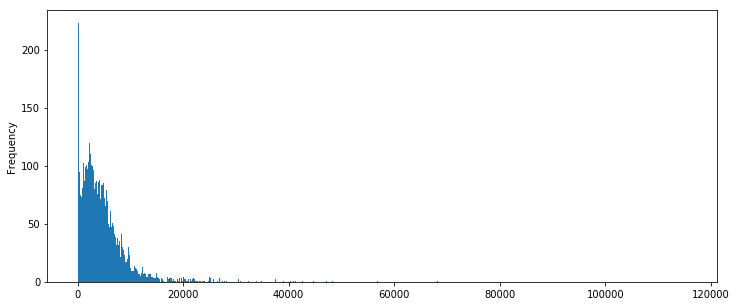

In [35]:
# Draw a graph of text length verse frequency

import matplotlib
%matplotlib inline
df['text'].str.len().plot(kind = 'hist', bins = 1000, figsize = (12,5))

## Tokenization and punctuation cleaning
***

In [36]:
# Tokenized the word for future use

from string import punctuation
texts = df.text+df.title
mapping_table = {ord(char): u' ' for char in punctuation}
tokenized = [nltk.word_tokenize(review.translate(mapping_table)) for review in texts]

In [37]:
# Clean the tokenized text which stand for punctuation

def clean_text(tokenized_list):
    import string
    sw = nltk.corpus.stopwords.words('english')
    sw.append("“")
    sw.append("”")
    sw.append("’")
    sw.append("‘")
    sw.append("—")
    new_list = [[token.lower() for token in tlist if token not in string.punctuation 
                 and token.lower() not in sw] for tlist in tokenized_list]
    return new_list
cleaned = clean_text(tokenized)

In [45]:
# Import the Word2Vec Model and LogisticRegression for checking the performance of Word2Vec parameters

from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
target_names = ['FAKE', 'REAL']
y = np.array(df['label']) 
seed = 2
test_size = 0.33

In [39]:
# The easy-reading version of report

def new_report(y0_test, y0_pred):
    print ("  Accuracy: {:.5f}  Precision: {:.5f}  Recall: {:.5f}  F-1: {:.5f}"
           .format(accuracy_score(y0_test, y0_pred), precision_score(y0_test, y0_pred), 
                   recall_score(y0_test, y0_pred), f1_score(y0_test, y0_pred)))

In [40]:
# The building function of word vectors

def vectors_build(word_vectors, cleaned, word_model):
    for i in range(0, len(df)):
        word_vectors[i] = 0
        for word in cleaned[i]:
            word_vectors[i] += word_model[word]
        if len(cleaned[i]) != 0:
            word_vectors[i] = word_vectors[i] / len(cleaned[i])
    return word_vectors

## Hypertuning Word2Vec model
***

* We tested all the parameter that a word2vec model has, but it turns out only few of them are changeable.
* In order to present clearly, we hide the unchanged parameters.
* Changeable parameters including size, window, alpha, iter, batch words and negative.
* We did use the randam searching for parameters in the word2vec model, but the result didn't go well.
* Because of the number of parameters, grid search is also hard to implement.
* Need to mention that although I set the seed value, because of workers = 4, I can not eliminate ordering jitter from OS thread scheduling, which cause some random result appeared.
* In conclusion, each parameter can only contribute a very small percentage to the final result.

### Original

The original model is filled with the default parameters.

In [46]:
# Try the default parameter of Word2Vec Model

word_model = Word2Vec(cleaned, seed = seed, min_count = 1, size = 100, 
                      window = 5, alpha = 0.025, iter = 10, 
                      batch_words = 10000, negative = 5)
word_vectors = np.zeros((len(df), 100))
word_vectors = vectors_build(word_vectors, cleaned, word_model)
x0_train, x0_test, y0_train, y0_test = train_test_split(word_vectors, y, test_size=test_size, random_state=seed)
LR0_model = LogisticRegression().fit(x0_train, y0_train)
y0_pred = LR0_model.predict(x0_test)

print("Word2Vec, original:")
new_report(y0_test, y0_pred)

/Users/lifesaver/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


Word2Vec, original:
  Accuracy: 0.89479  Precision: 0.90049  Recall: 0.88665  F-1: 0.89351


### Changing the size

We use 50 as the scale, and try to find out the best size within 50 to 500.

In [49]:
# Testing the influence of size and use 50 as difference

for j in range(1,11):
    word_model = Word2Vec(cleaned, seed = seed, min_count = 1, size = 50*j, 
                      window = 5, alpha = 0.025, iter = 10, 
                      batch_words = 10000, negative = 5, workers = 4)
    word_vectors = np.zeros((len(df), 50*j))
    word_vectors = vectors_build(word_vectors, cleaned, word_model)
    x0_train, x0_test, y0_train, y0_test = train_test_split(word_vectors, y, test_size=test_size, random_state=seed)
    LR0_model = LogisticRegression().fit(x0_train, y0_train)
    y0_pred = LR0_model.predict(x0_test)
    
    print("Word2Vec, size =", 50*j, ":")
    new_report(y0_test, y0_pred)

/Users/lifesaver/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


Word2Vec, size = 50 :
  Accuracy: 0.88953  Precision: 0.89168  Recall: 0.88569  F-1: 0.88867
Word2Vec, size = 100 :
  Accuracy: 0.89718  Precision: 0.89865  Recall: 0.89433  F-1: 0.89649
Word2Vec, size = 150 :
  Accuracy: 0.89622  Precision: 0.89692  Recall: 0.89433  F-1: 0.89562
Word2Vec, size = 200 :
  Accuracy: 0.90196  Precision: 0.90115  Recall: 0.90202  F-1: 0.90158
Word2Vec, size = 250 :
  Accuracy: 0.89766  Precision: 0.89569  Recall: 0.89914  F-1: 0.89741
Word2Vec, size = 300 :
  Accuracy: 0.89861  Precision: 0.90048  Recall: 0.89529  F-1: 0.89788
Word2Vec, size = 350 :
  Accuracy: 0.90005  Precision: 0.90388  Recall: 0.89433  F-1: 0.89908
Word2Vec, size = 400 :
  Accuracy: 0.89527  Precision: 0.89672  Recall: 0.89241  F-1: 0.89456
Word2Vec, size = 450 :
  Accuracy: 0.89622  Precision: 0.89845  Recall: 0.89241  F-1: 0.89542
Word2Vec, size = 500 :
  Accuracy: 0.89766  Precision: 0.89875  Recall: 0.89529  F-1: 0.89702


Apparently when the size = 350 we got the best performance.

### Changing the window
Window parameter represent the distance between the current and predicted word, and we change it from 1 to 10.

In [51]:
for j in range(1,11):
    word_model = Word2Vec(cleaned, seed = seed, min_count = 1, size = 350, 
                      window = j, alpha = 0.025, iter = 10, 
                      batch_words = 10000, negative = 5)
    word_vectors = np.zeros((len(df), 350))
    word_vectors = vectors_build(word_vectors, cleaned, word_model)
    x0_train, x0_test, y0_train, y0_test = train_test_split(word_vectors, y, test_size=test_size, random_state=seed)
    LR0_model = LogisticRegression().fit(x0_train, y0_train)
    y0_pred = LR0_model.predict(x0_test)
    
    print("Word2Vec, window =", j,":")
    new_report(y0_test, y0_pred)

/Users/lifesaver/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


Word2Vec, window = 1 :
  Accuracy: 0.88379  Precision: 0.89272  Recall: 0.87128  F-1: 0.88187
Word2Vec, window = 2 :
  Accuracy: 0.88714  Precision: 0.89733  Recall: 0.87320  F-1: 0.88510
Word2Vec, window = 3 :
  Accuracy: 0.89718  Precision: 0.89942  Recall: 0.89337  F-1: 0.89639
Word2Vec, window = 4 :
  Accuracy: 0.89813  Precision: 0.90351  Recall: 0.89049  F-1: 0.89695
Word2Vec, window = 5 :
  Accuracy: 0.89957  Precision: 0.90145  Recall: 0.89625  F-1: 0.89884
Word2Vec, window = 6 :
  Accuracy: 0.90005  Precision: 0.89923  Recall: 0.90010  F-1: 0.89966
Word2Vec, window = 7 :
  Accuracy: 0.90244  Precision: 0.89971  Recall: 0.90490  F-1: 0.90230
Word2Vec, window = 8 :
  Accuracy: 0.90292  Precision: 0.90288  Recall: 0.90202  F-1: 0.90245
Word2Vec, window = 9 :
  Accuracy: 0.90340  Precision: 0.90221  Recall: 0.90394  F-1: 0.90307
Word2Vec, window = 10 :
  Accuracy: 0.90196  Precision: 0.90192  Recall: 0.90106  F-1: 0.90149


Easy to see the best window size is 9, which give us the highest result in all the dimension.

### Changing the alpha

The range of alpha is from 0.015 to 0.060, and the step is 0.005.

In [52]:
for j in range(1,10):
    word_model = Word2Vec(cleaned, seed = seed, min_count = 1, size = 350, 
                      window = 9, alpha = 0.01+ 0.005*j, iter = 10, 
                      batch_words = 10000, workers = 3, negative = 5)
    word_vectors = np.zeros((len(df), 350))
    word_vectors = vectors_build(word_vectors, cleaned, word_model)
    x0_train, x0_test, y0_train, y0_test = train_test_split(word_vectors, y, test_size=test_size, random_state=seed)
    LR0_model = LogisticRegression()
    LR0_model = LR0_model.fit(x0_train, y0_train)
    y0_pred = LR0_model.predict(x0_test)
    
    print("Word2Vec, alpha =",(0.01+0.005*j),":")
    new_report(y0_test, y0_pred)

/Users/lifesaver/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


Word2Vec, alpha = 0.015 :
  Accuracy: 0.89909  Precision: 0.90058  Recall: 0.89625  F-1: 0.89841
Word2Vec, alpha = 0.02 :
  Accuracy: 0.90053  Precision: 0.90010  Recall: 0.90010  F-1: 0.90010
Word2Vec, alpha = 0.025 :
  Accuracy: 0.90531  Precision: 0.90490  Recall: 0.90490  F-1: 0.90490
Word2Vec, alpha = 0.03 :
  Accuracy: 0.90674  Precision: 0.90209  Recall: 0.91162  F-1: 0.90683
Word2Vec, alpha = 0.035 :
  Accuracy: 0.90244  Precision: 0.90202  Recall: 0.90202  F-1: 0.90202
Word2Vec, alpha = 0.04 :
  Accuracy: 0.90387  Precision: 0.90153  Recall: 0.90586  F-1: 0.90369
Word2Vec, alpha = 0.045000000000000005 :
  Accuracy: 0.90770  Precision: 0.90848  Recall: 0.90586  F-1: 0.90717
Word2Vec, alpha = 0.05 :
  Accuracy: 0.90866  Precision: 0.90631  Recall: 0.91066  F-1: 0.90848
Word2Vec, alpha = 0.055 :
  Accuracy: 0.90961  Precision: 0.90805  Recall: 0.91066  F-1: 0.90935


### Changing the iters
We change the iterier from 6 to 15.

In [53]:
for j in range(1,11):
    word_model = Word2Vec(cleaned, size = 300, window = 5, min_count = 1, 
                          alpha = 0.045, iter= 5 + j, 
                          batch_words = 10000, workers = 4, negative = 5)
    word_vectors = np.zeros((len(df), 300))
    word_vectors = vectors_build(word_vectors, cleaned, word_model)
    x0_train, x0_test, y0_train, y0_test = train_test_split(word_vectors, y, test_size=test_size, random_state=seed)
    LR0_model = LogisticRegression().fit(x0_train, y0_train)
    y0_pred = LR0_model.predict(x0_test)
    
    print("Word2Vec, iter =",(5+j),":")
    new_report(y0_test, y0_pred)

/Users/lifesaver/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


Word2Vec, alpha = 0.015 :
  Accuracy: 0.89431  Precision: 0.89575  Recall: 0.89145  F-1: 0.89360
Word2Vec, alpha = 0.02 :
  Accuracy: 0.90340  Precision: 0.90375  Recall: 0.90202  F-1: 0.90288
Word2Vec, alpha = 0.025 :
  Accuracy: 0.89766  Precision: 0.89569  Recall: 0.89914  F-1: 0.89741
Word2Vec, alpha = 0.03 :
  Accuracy: 0.90100  Precision: 0.89943  Recall: 0.90202  F-1: 0.90072
Word2Vec, alpha = 0.035 :
  Accuracy: 0.89909  Precision: 0.89449  Recall: 0.90394  F-1: 0.89919
Word2Vec, alpha = 0.04 :
  Accuracy: 0.90100  Precision: 0.89790  Recall: 0.90394  F-1: 0.90091
Word2Vec, alpha = 0.045000000000000005 :
  Accuracy: 0.90053  Precision: 0.89856  Recall: 0.90202  F-1: 0.90029
Word2Vec, alpha = 0.05 :
  Accuracy: 0.90196  Precision: 0.90115  Recall: 0.90202  F-1: 0.90158
Word2Vec, alpha = 0.055 :
  Accuracy: 0.90483  Precision: 0.89943  Recall: 0.91066  F-1: 0.90501
Word2Vec, alpha = 0.060000000000000005 :
  Accuracy: 0.90244  Precision: 0.90048  Recall: 0.90394  F-1: 0.90221


As we can see, the iter did not have a specific change to final result, but we can see that the best iteration here is 14.

### Changing the batch_words
Batch words is target size (in words) for batches of examples passed to worker threads. And we try to reduce the parameter here.

In [56]:
for j in range(1, 4):
    word_model = Word2Vec(cleaned, size = 350, window = 5, min_count = 1, 
                          alpha = 0.04, iter = 14, 
                          batch_words = 11000 - 1000*j, workers= 4, negative = 5)
    word_vectors = np.zeros((len(df), 350))
    word_vectors = vectors_build(word_vectors, cleaned, word_model)
    x0_train, x0_test, y0_train, y0_test = train_test_split(word_vectors, y, test_size=test_size, random_state=seed)
    LR0_model = LogisticRegression().fit(x0_train, y0_train)
    
    print("Word2Vec, batch_words =",(11000 - 1000*j),":")
    y0_pred = LR0_model.predict(x0_test)
    new_report(y0_test, y0_pred)

/Users/lifesaver/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


Word2Vec, batch_words = 10000 :
  Accuracy: 0.90626  Precision: 0.90200  Recall: 0.91066  F-1: 0.90631
Word2Vec, batch_words = 9000 :
  Accuracy: 0.90579  Precision: 0.90267  Recall: 0.90874  F-1: 0.90570
Word2Vec, batch_words = 8000 :
  Accuracy: 0.90531  Precision: 0.90181  Recall: 0.90874  F-1: 0.90526


Surprisingly when the batch_word = 10000 we get the best result.

### Changing the nagetive
Last but not least, we attempted to change the nagetive value.

In [57]:
for j in range(1, 6):
    word_model = Word2Vec(cleaned, size = 350, window = 5, min_count = 1, 
                          alpha = 0.04, iter = 14, 
                          batch_words = 10000, workers= 4, negative = 4+j)
    word_vectors = np.zeros((len(df), 350))
    word_vectors = vectors_build(word_vectors, cleaned, word_model)
    x0_train, x0_test, y0_train, y0_test = train_test_split(word_vectors, y, test_size=test_size, random_state=seed)
    LR0_model = LogisticRegression().fit(x0_train, y0_train)
    
    print("Word2Vec, negative =",(4 + j),":")
    y0_pred = LR0_model.predict(x0_test)
    new_report(y0_test, y0_pred)

/Users/lifesaver/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


Word2Vec, negative = 5 :
  Accuracy: 0.90387  Precision: 0.89924  Recall: 0.90874  F-1: 0.90397
Word2Vec, negative = 6 :
  Accuracy: 0.90435  Precision: 0.89858  Recall: 0.91066  F-1: 0.90458
Word2Vec, negative = 7 :
  Accuracy: 0.90626  Precision: 0.90431  Recall: 0.90778  F-1: 0.90604
Word2Vec, negative = 8 :
  Accuracy: 0.90244  Precision: 0.89668  Recall: 0.90874  F-1: 0.90267
Word2Vec, negative = 9 :
  Accuracy: 0.90626  Precision: 0.90047  Recall: 0.91258  F-1: 0.90649


The best result we get is when nagetive value = 7, so we choose that as our last parameter.

### Result

* The best combination of parameters:
* size = 350, window = 5, alpha = 0.04, iter = 14, batch_words = 10000, negative = 7
* The results:
* Accuracy: 0.90626  Precision: 0.90431  Recall: 0.90778  F-1: 0.90604

## Choosing the parameter of Classifier
***

* We use logistic regression, random forest and xgboost to find the best result.
* As usual, we hide the unnecessary and unchangeable parameters in the description of model.
* We use grid search to help us find the best result.
* To be more specific, we only show the result with the best parameter set in.

In [68]:
# The grid_search function

def grid_search(model, X, Y):
    grid_search = GridSearchCV(model, param, scoring="accuracy", n_jobs = 1)
    grid_result = grid_search.fit(X, Y)
    print("Best Accuracy:", grid_result.best_score_)
    print("Parameter set:", grid_result.best_params_)
    model.set_params(**grid_result.best_params_)
    model.fit(X, Y)
    y0_pred = model.predict(x0_test)
    new_report(y0_test, y0_pred)

In [58]:
# Use the best result from Word2Vec

word_model = Word2Vec(cleaned, size = 350, window = 5, min_count = 1, alpha = 0.04, 
                      iter = 14, batch_words = 10000, workers= 4, negative = 7)
word_vectors = np.zeros((len(df), 350))
word_vectors = vectors_build(word_vectors, cleaned, word_model)
x0_train, x0_test, y0_train, y0_test = train_test_split(word_vectors, y, test_size=test_size, random_state=seed)

/Users/lifesaver/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


### LogisticRegression
**Positive**
* The procession of calulation is very fast and do not use lot of storage area.

**Nagetive**
* Not good when processing a large amount of variables.
* Less fitting.

In [69]:
from sklearn.model_selection import GridSearchCV
param = {
    'C': [1.0, 1.5, 2.0],
    'tol':[0.0001, 0.0002, 0.0003],
    'penalty': ['l1', 'l2'],
    'intercept_scaling': [1,2,3]
}

grid_search(LogisticRegression(random_state = 2),x0_train,y0_train)

Best Accuracy: 0.9147031102733271
Parameter set: {'C': 2.0, 'intercept_scaling': 3, 'penalty': 'l2', 'tol': 0.0001}
  Accuracy: 0.90292  Precision: 0.89905  Recall: 0.90682  F-1: 0.90292


### Result

* The best combination of parameters:
* 'C': 2.0, 'intercept_scaling': 3, 'penalty': 'l2', 'tol': 0.0001
* The results:
* Accuracy: 0.91470  Precision: 0.90905  Recall: 0.91682  F-1: 0.91292

### Random Forest
** Positive **
* Easy to handle high dimension datas.
* The result are smoother.

** Nagetive **
* Only when the number of trees are big enough.
* Difficult to handle inbalance dataset.

In [70]:
from sklearn.ensemble import RandomForestClassifier
param = {
    'n_estimators': [10, 25, 50],
    'min_samples_split':[2, 3, 4],
    'verbose': [0, 3],
    'min_weight_fraction_leaf': [0.0, 0.1]
}

grid_search(RandomForestClassifier(random_state = 2),x0_train,y0_train)

building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(

building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25
building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(

building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25
building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25
building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25
building tree 1 of 25
building tree 2 of 25
building tree 3 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.9s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.7s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    1.8s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10
building tree 1 of 10
building tree 2 of 10
building tree 3 of 10
building tree 4 of 10
building tree 5 of 10
building tree 6 of 10
building tree 7 of 10
building tree 8 of 10
building tree 9 of 10
building tree 10 of 10


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(

building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25
building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 25
building tree 2 of 25
building tree 3 of 25
building tree 4 of 25
building tree 5 of 25
building tree 6 of 25
building tree 7 of 25
building tree 8 of 25
building tree 9 of 25
building tree 10 of 25
building tree 11 of 25
building tree 12 of 25
building tree 13 of 25
building tree 14 of 25
building tree 15 of 25
building tree 16 of 25
building tree 17 of 25
building tree 18 of 25
building tree 19 of 25
building tree 20 of 25
building tree 21 of 25
building tree 22 of 25
building tree 23 of 25
building tree 24 of 25
building tree 25 of 25


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.3s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.0s finished


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 50
building tree 45 of 50
building tree 46 of 50
building tree 47 of 50
building tree 48 of 50
building tree 49 of 50
building tree 50 of 50


[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


Best Accuracy: 0.8897266729500471
Parameter set: {'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 50, 'verbose': 0}
  Accuracy: 0.88714  Precision: 0.90130  Recall: 0.86840  F-1: 0.88454


In [76]:
RF0_model = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=4, 
                                   min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', 
                                   max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, 
                                   bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=3, 
                                   warm_start=False, class_weight=None)
RF0_model = RF0_model.fit(x0_train, y0_train)
print("Word2Vec + RF:",RF0_model.score(x0_test, y0_test))
y0_pred = RF0_model.predict(x0_test)
new_report(y0_test, y0_pred)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 1

[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    5.4s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished


### Result

* The best combination of parameters:
* 'min_samples_split': 'min_samples_split': 3, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'verbose': 0
* The results:
* Accuracy: 0.89240  Precision: 0.91046  Recall: 0.86936  F-1: 0.88943

### Xgboost

** Positive **
* Regularization term is added into the algorithem, decrease the complexity and made itself faster.
* The variance is also decreased with regularization term added.

** Nagetive **
* Time

** Need to montion **
* Because of the time cost, we did not use the grid search

In [71]:
from xgboost import XGBClassifier
XG0_model = XGBClassifier(max_depth=7, learning_rate=0.2, 
                        n_estimators=20, silent=True, 
                        objective='binary:logistic', nthread=-1, 
                        gamma=0, min_child_weight=1, max_delta_step=0, 
                        subsample=1, colsample_bytree=1, 
                        colsample_bylevel=1, reg_alpha=0, 
                        reg_lambda=1, scale_pos_weight=1, 
                        base_score=0.5, seed=0, missing=None)
XG0_model = XG0_model.fit(x0_train, y0_train)
print("Word2Vec + XG:",XG0_model.score(x0_test, y0_test))
y0_pred = XG0_model.predict(x0_test)
print(classification_report(y0_test, y0_pred, target_names=target_names))

Word2Vec + XG: 0.8895265423242468
             precision    recall  f1-score   support

       FAKE       0.88      0.90      0.89      1050
       REAL       0.90      0.88      0.89      1041

avg / total       0.89      0.89      0.89      2091



/Users/lifesaver/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/lifesaver/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [72]:
from xgboost import XGBClassifier
XG0_model = XGBClassifier(max_depth=6, learning_rate=0.2, 
                        n_estimators=20, silent=True, 
                        objective='binary:logistic', nthread=-1, 
                        gamma=0, min_child_weight=1, max_delta_step=0, 
                        subsample=1, colsample_bytree=1, 
                        colsample_bylevel=1, reg_alpha=0, 
                        reg_lambda=1, scale_pos_weight=1, 
                        base_score=0.5, seed=0, missing=None)
XG0_model = XG0_model.fit(x0_train, y0_train)
print("Word2Vec + XG:",XG0_model.score(x0_test, y0_test))
y0_pred = XG0_model.predict(x0_test)
print(classification_report(y0_test, y0_pred, target_names=target_names))

Word2Vec + XG: 0.8900047824007652
             precision    recall  f1-score   support

       FAKE       0.88      0.90      0.89      1050
       REAL       0.90      0.88      0.89      1041

avg / total       0.89      0.89      0.89      2091



/Users/lifesaver/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/lifesaver/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [77]:
from xgboost import XGBClassifier
XG0_model = XGBClassifier(max_depth=6, learning_rate=0.3, 
                        n_estimators=200, silent=True, 
                        objective='binary:logistic', nthread=-1, 
                        gamma=0, min_child_weight=2, max_delta_step=0, 
                        subsample=1, colsample_bytree=1, 
                        colsample_bylevel=1, reg_alpha=0, 
                        reg_lambda=3, scale_pos_weight=1, 
                        base_score=0.5, seed=0, missing=None)
XG0_model = XG0_model.fit(x0_train, y0_train)
print("Word2Vec + XG:",XG0_model.score(x0_test, y0_test))
y0_pred = XG0_model.predict(x0_test)
new_report(y0_test, y0_pred)

Word2Vec + XG: 0.9096126255380201
  Accuracy: 0.90961  Precision: 0.91359  Recall: 0.90394  F-1: 0.90874


/Users/lifesaver/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/Users/lifesaver/miniconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


### Result

* The best combination of parameters:
* max_depth=6, learning_rate=0.3, n_estimators=250
* The results:
* Accuracy: 0.90866  Precision: 0.91504  Recall: 0.90010  F-1: 0.90751

## Conclusion
***

* According to result, the best classifier for word2vec is logistic regression with an over 91% accuracy.
* Can not assure that the LR classifier is the best because of the comparison to last time result.
* LR is not highly stable. XGboost is more stable when we rerun the test for several times.
* Grid search is great, but when it comes many parameter, it may not efficient as before.
* The score in the grid search is very important.

# Conclusion

### In this report, we do several task list below:
(1) Preparation for the dataset and data cleaning  
(2) Data mining: we try to figure out some features of the data  
(3) Feature Engineering: We get the Tf-idf, Doc2Vec, Word2Vec of the text and title, and we try diferent way to combine those vectors  
(4) Classification: We try several classify models such as logistic regrssion, SVM, RandomForests, and XGboost.  
(5) Hyper Tunning: According to different pipelines we designed, we try hyper tunning those classify models as well as the Vector model.

### And we got some important results or findings list below
(1) Add externel dataset doesn't help a lot with the classification and cost much more extra time.  
(2) The TF-IDF help the logistic and SVM model improve the accuracy over one percentage, however, doesn't influence the xgboost a lot  
(3) We got some most frequent key words of the fake news, impoly the subject of the fake news mostly in politics and economics or society, and we also get the words number distribution of the articles.  
(4) Result of multiple classifiers work together is better than single one's.  
(5) The doc2vec model is good if each dimension of the document vectors are of same importance  
(6) We choose two Doc2Vec models with the lowest coefficient of cariation as the best models for hypertuning.  
No.1: Size=100, Window=1  
No.2: Size=300, Window=1, Fortified by Google News Word2Vec Model

And our best models is doc2vec + word2vec of title and text with help of Google News Model, and our final F1-rate and precision rate is higher than 0.92